In [4]:
import numpy as np
import tensorflow as tf

# Define dataset path
dataset_path = "E:/WINTER SEMESTER 24-45/DIGITAL IMAGE PROCESSING/archive/train"

# Load dataset using TensorFlow's utility function
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path, 
    image_size=(224, 224), 
    batch_size=32
)

# Convert to NumPy arrays
X_train = []
y_train = []

for images, labels in train_ds:
    X_train.extend(images.numpy())  # Convert to NumPy and append
    y_train.extend(labels.numpy())

# Convert lists to NumPy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

print("Dataset loaded successfully!", X_train.shape, y_train.shape)


Found 9500 files belonging to 100 classes.
Dataset loaded successfully! (9500, 224, 224, 3) (9500,)


In [13]:
import tensorflow as tf

# Define dataset path
dataset_path = "E:/WINTER SEMESTER 24-45/DIGITAL IMAGE PROCESSING/archive/train"

# Load dataset using image_dataset_from_directory
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    image_size=(224, 224),
    batch_size=32,
    shuffle=True
)

# Split dataset into training and testing sets (80-20 split)
train_size = int(0.8 * len(dataset))
train_ds = dataset.take(train_size)  # 80% for training
test_ds = dataset.skip(train_size)   # 20% for testing

print("Dataset loaded successfully!")
print("Training batches:", len(train_ds))
print("Testing batches:", len(test_ds))


Found 9500 files belonging to 100 classes.
Dataset loaded successfully!
Training batches: 237
Testing batches: 60


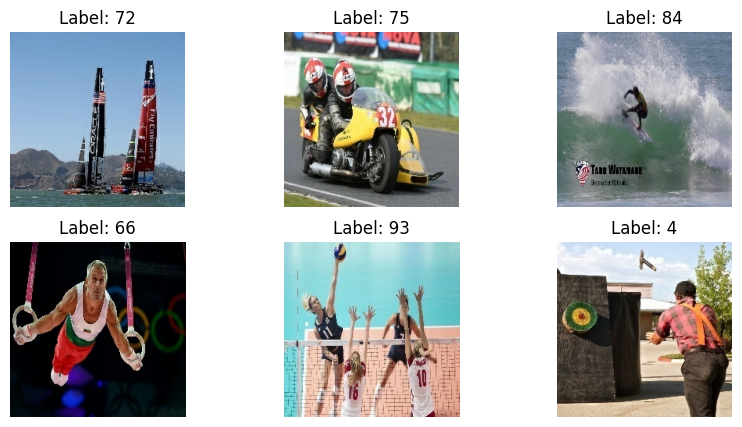

In [14]:
import matplotlib.pyplot as plt

# ✅ Normalize images
def normalize_img(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize pixel values
    return image, label

# Apply normalization
train_ds = train_ds.map(normalize_img)
test_ds = test_ds.map(normalize_img)

# ✅ Visualize sample images
plt.figure(figsize=(10, 5))
for images, labels in train_ds.take(1):  # Take one batch
    for i in range(6):  # Show 6 images
        plt.subplot(2, 3, i + 1)
        plt.imshow(images[i].numpy())  # Convert tensor to NumPy
        plt.title(f"Label: {labels[i].numpy()}")
        plt.axis("off")

plt.show()


In [27]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Define dataset path
dataset_path = r"E:\WINTER SEMESTER 24-45\DIGITAL IMAGE PROCESSING\archive\train"

# Load dataset using image_dataset_from_directory
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    image_size=(224, 224),
    batch_size=32,
    shuffle=True,
    seed=42
)

# Get class names
class_names = dataset.class_names

# Extract one batch of images correctly
for batch_images, batch_labels in dataset.take(1):  # Take a single batch
    sample_images = batch_images.numpy()  # Convert tensor to NumPy array
    sample_labels = batch_labels.numpy()  # Get corresponding labels


Found 9500 files belonging to 100 classes.


In [28]:
def preprocess_image(image):
    """Apply preprocessing steps: Grayscale, Denoising, Edge Detection."""

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Apply Gaussian blur for denoising
    denoised = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply Canny Edge Detection
    edges = cv2.Canny(denoised, 100, 200)

    return gray, denoised, edges


In [29]:
def plot_images(original, grayscale, denoised, edges, label):
    """Displays original and preprocessed images in one row."""
    fig, axes = plt.subplots(1, 4, figsize=(12, 4))
    
    axes[0].imshow(original.astype("uint8"))  # Original Image
    axes[0].set_title("Original")
    
    axes[1].imshow(grayscale, cmap="gray")  # Grayscale Image
    axes[1].set_title("Grayscale")
    
    axes[2].imshow(denoised, cmap="gray")  # Denoised Image
    axes[2].set_title("Denoised")
    
    axes[3].imshow(edges, cmap="gray")  # Edge Detection Image
    axes[3].set_title("Edges")
    
    for ax in axes:
        ax.axis("off")  # Hide axes

    plt.suptitle(f"Class: {class_names[label]}")
    plt.show()


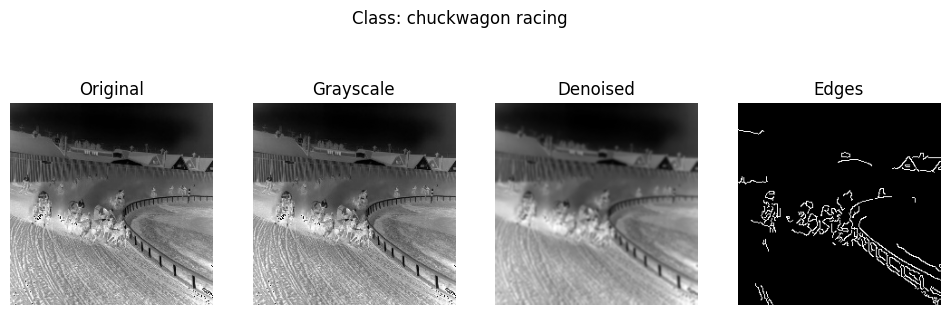

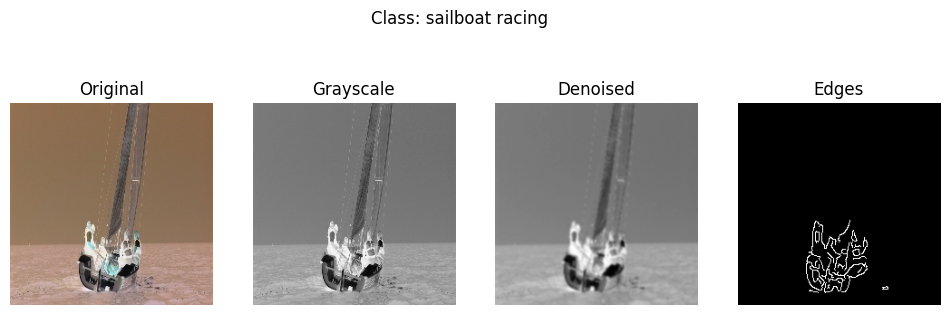

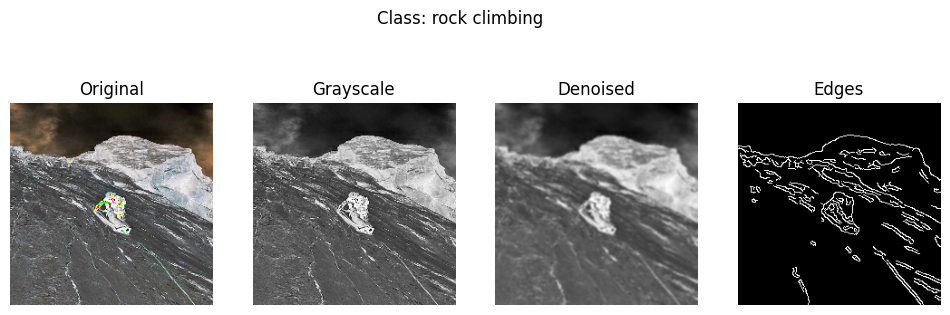

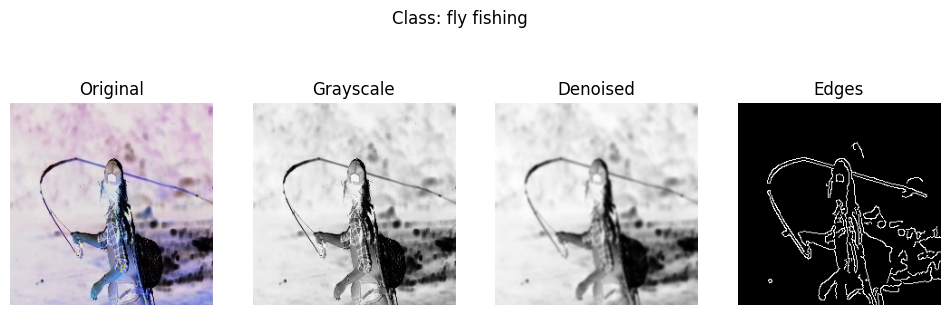

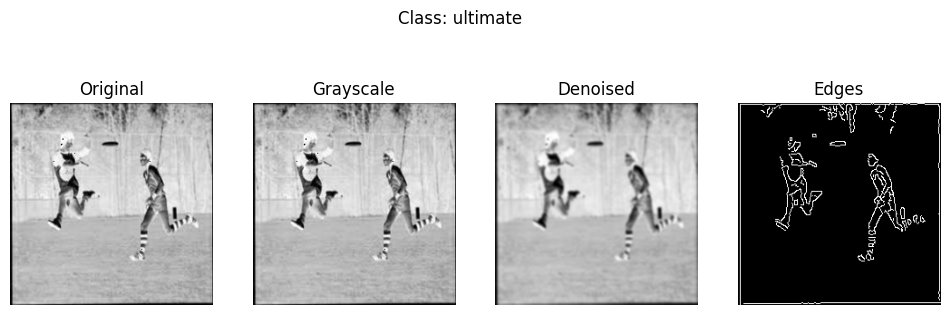

In [30]:
# Display first 5 images with preprocessing
for i in range(5):
    img = (sample_images[i] * 255).astype(np.uint8)  # Convert to 8-bit format
    label = sample_labels[i]  # Get corresponding label

    # Apply preprocessing
    grayscale, denoised, edges = preprocess_image(img)

    # Display results
    plot_images(img, grayscale, denoised, edges, label)


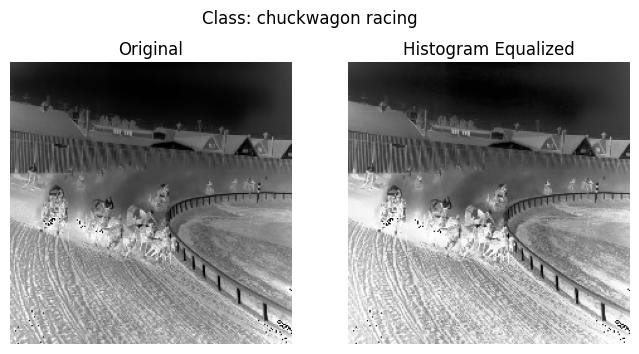

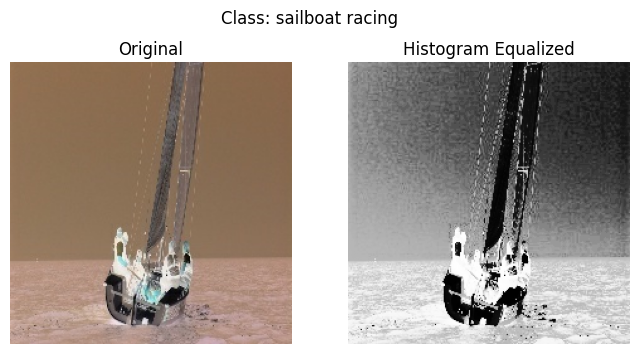

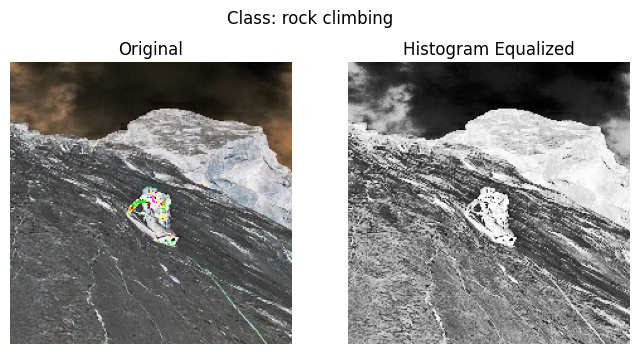

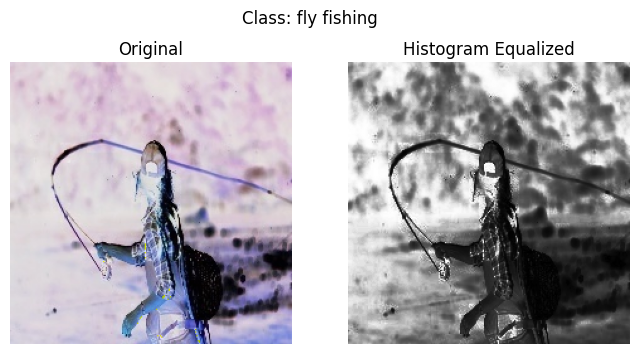

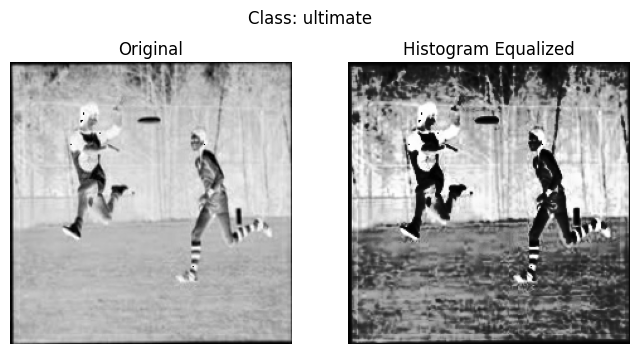

In [31]:
def apply_histogram_equalization(image):
    """Applies histogram equalization to enhance contrast."""
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  # Convert to grayscale
    hist_eq = cv2.equalizeHist(gray)  # Apply histogram equalization
    return hist_eq

# Display first 5 images with Histogram Equalization
for i in range(5):
    img = (sample_images[i] * 255).astype(np.uint8)  # Convert to 8-bit format
    hist_eq_img = apply_histogram_equalization(img)  # Apply histogram equalization
    
    # Show original vs. histogram equalized images
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].imshow(img.astype("uint8"))  # Original Image
    axes[0].set_title("Original")
    
    axes[1].imshow(hist_eq_img, cmap="gray")  # Histogram Equalized Image
    axes[1].set_title("Histogram Equalized")
    
    for ax in axes:
        ax.axis("off")  # Hide axes

    plt.suptitle(f"Class: {class_names[sample_labels[i]]}")
    plt.show()


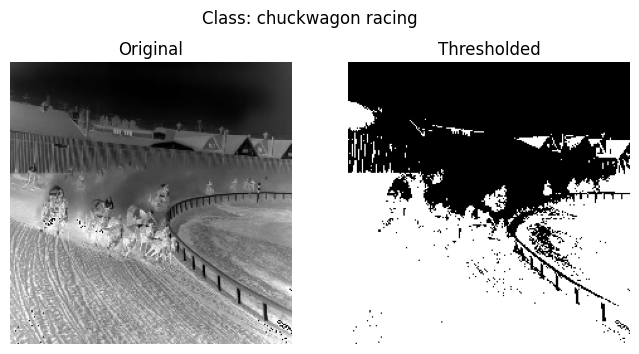

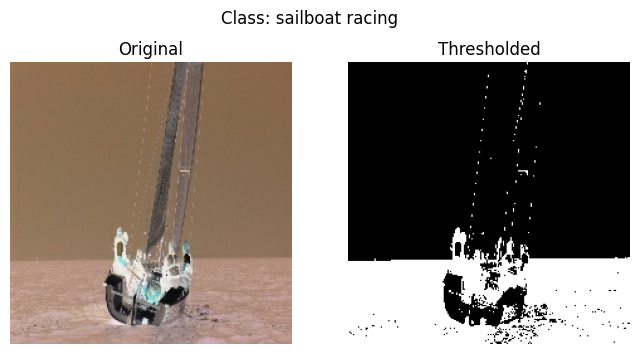

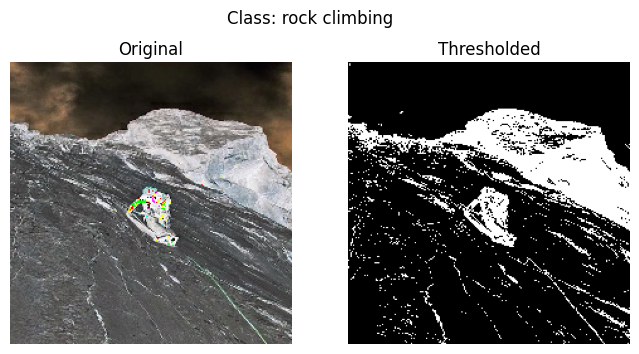

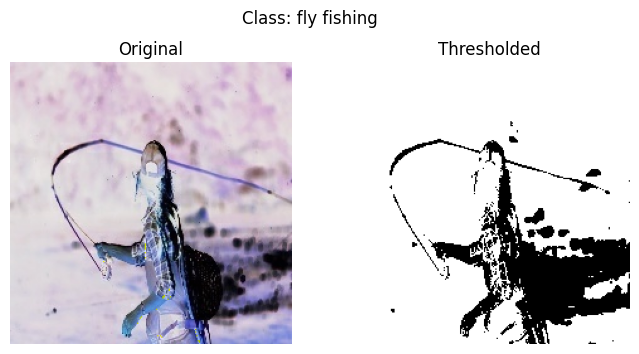

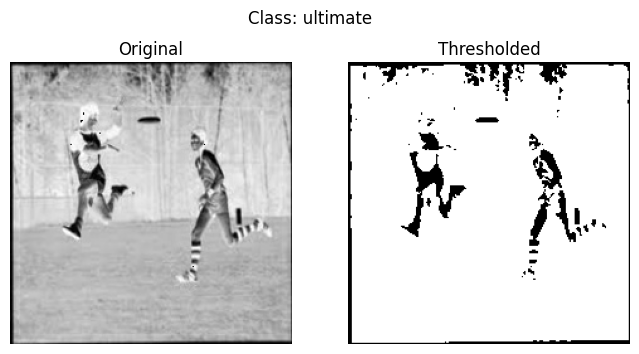

In [32]:
def apply_thresholding(image):
    """Applies image thresholding to enhance features."""
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  # Convert to grayscale
    
    # Apply Otsu's Thresholding (automatically selects threshold value)
    _, thresholded = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    return thresholded

# Display first 5 images with Thresholding
for i in range(5):
    img = (sample_images[i] * 255).astype(np.uint8)  # Convert to 8-bit format
    thresholded_img = apply_thresholding(img)  # Apply thresholding
    
    # Show original vs. thresholded images
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].imshow(img.astype("uint8"))  # Original Image
    axes[0].set_title("Original")
    
    axes[1].imshow(thresholded_img, cmap="gray")  # Thresholded Image
    axes[1].set_title("Thresholded")
    
    for ax in axes:
        ax.axis("off")  # Hide axes

    plt.suptitle(f"Class: {class_names[sample_labels[i]]}")
    plt.show()


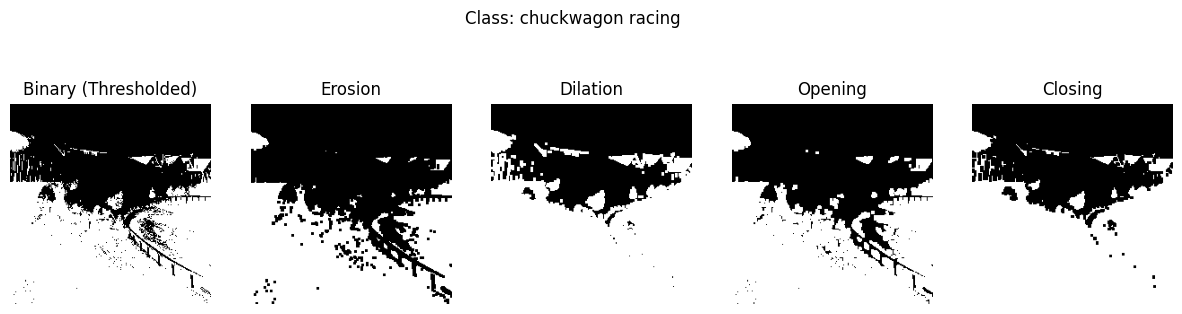

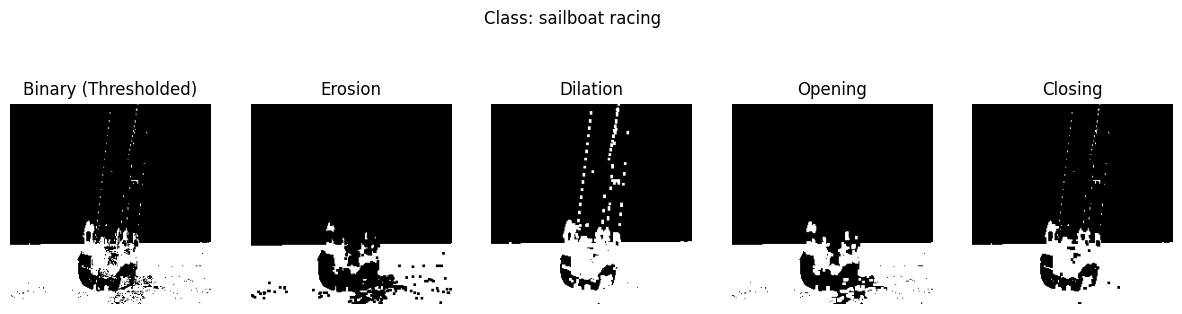

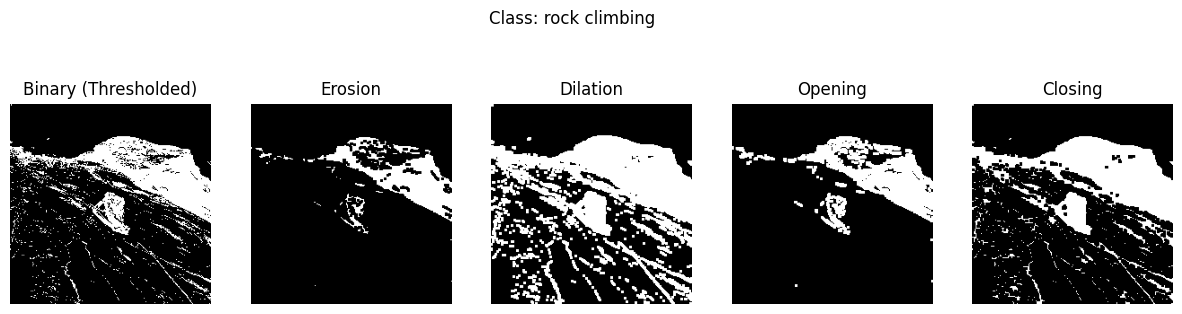

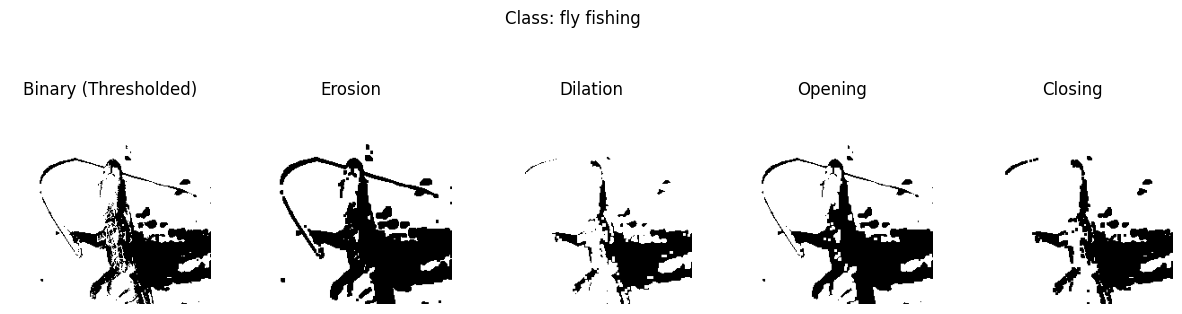

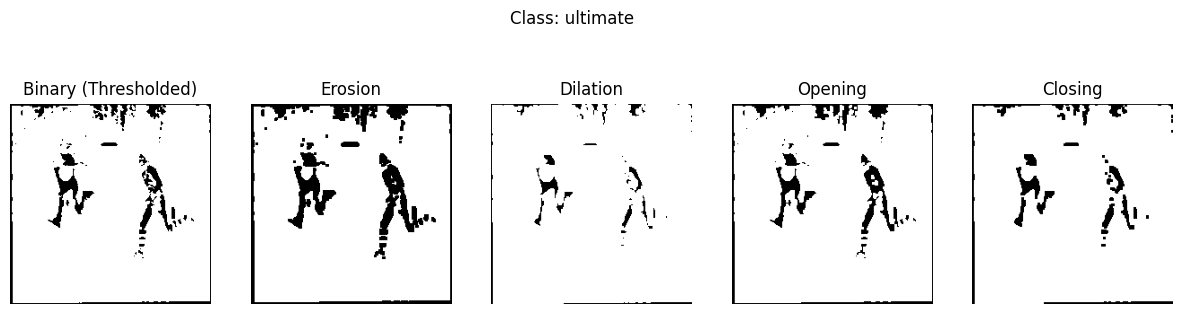

In [33]:
def apply_morphological_operations(image):
    """Applies morphological operations: Erosion, Dilation, Opening, Closing."""
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  # Convert to grayscale

    # Apply Otsu's Thresholding to get a binary image
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Define structuring element (kernel) - 3x3 square
    kernel = np.ones((3, 3), np.uint8)

    # Apply morphological operations
    erosion = cv2.erode(binary, kernel, iterations=1)
    dilation = cv2.dilate(binary, kernel, iterations=1)
    opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)  # Removes small noise
    closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)  # Fills small holes

    return binary, erosion, dilation, opening, closing

# Display first 5 images with Morphological Operations
for i in range(5):
    img = (sample_images[i] * 255).astype(np.uint8)  # Convert to 8-bit format
    binary, erosion, dilation, opening, closing = apply_morphological_operations(img)

    # Show original vs. morphological operation results
    fig, axes = plt.subplots(1, 5, figsize=(15, 4))
    
    axes[0].imshow(binary, cmap="gray")  # Binary Image
    axes[0].set_title("Binary (Thresholded)")
    
    axes[1].imshow(erosion, cmap="gray")  # Erosion
    axes[1].set_title("Erosion")
    
    axes[2].imshow(dilation, cmap="gray")  # Dilation
    axes[2].set_title("Dilation")
    
    axes[3].imshow(opening, cmap="gray")  # Opening
    axes[3].set_title("Opening")
    
    axes[4].imshow(closing, cmap="gray")  # Closing
    axes[4].set_title("Closing")
    
    for ax in axes:
        ax.axis("off")  # Hide axes

    plt.suptitle(f"Class: {class_names[sample_labels[i]]}")
    plt.show()


In [37]:
def extract_features(image):
    """Extracts HOG, LBP, and color histogram features."""
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  # Convert to grayscale

    # Extract HOG features (Fix: Removed `channel_axis=-1`)
    hog_features, hog_image = hog(gray, pixels_per_cell=(16, 16), 
                                  cells_per_block=(2, 2), visualize=True)

    # Extract LBP features
    lbp = local_binary_pattern(gray, lbp_n_points, lbp_radius, method='uniform')

    # Extract color histogram (in RGB channels)
    hist_r = cv2.calcHist([image], [0], None, [256], [0, 256])  # Red channel
    hist_g = cv2.calcHist([image], [1], None, [256], [0, 256])  # Green channel
    hist_b = cv2.calcHist([image], [2], None, [256], [0, 256])  # Blue channel

    return hog_image, lbp, hist_r, hist_g, hist_b


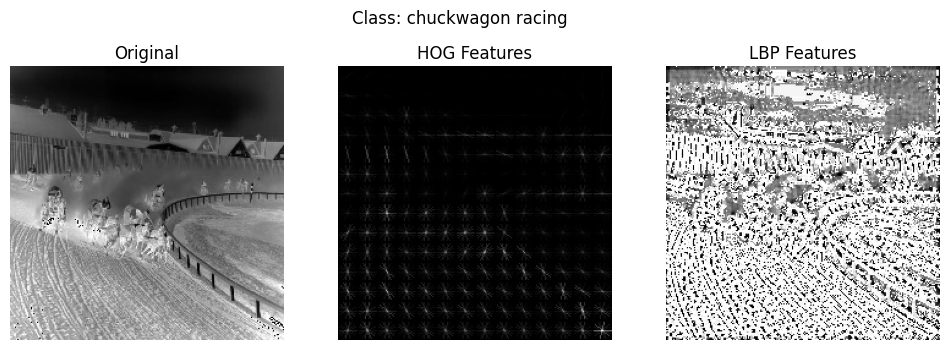

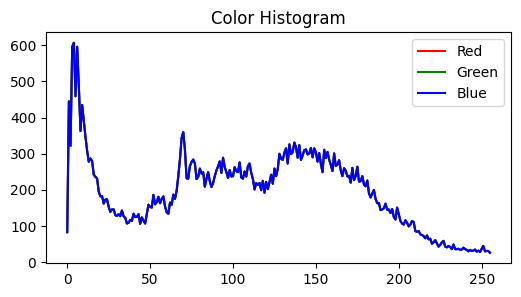

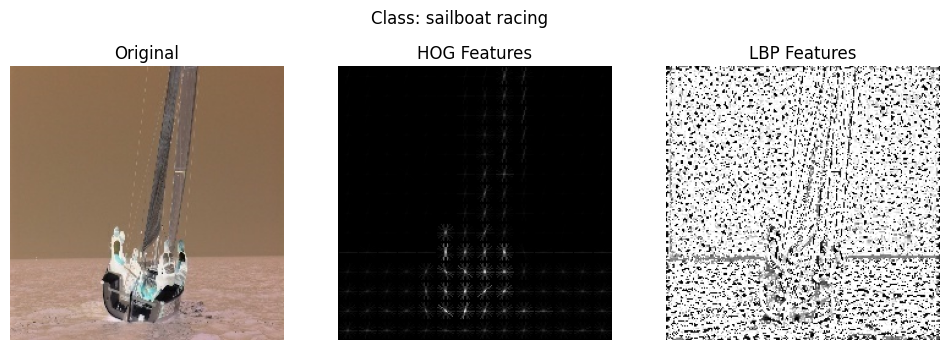

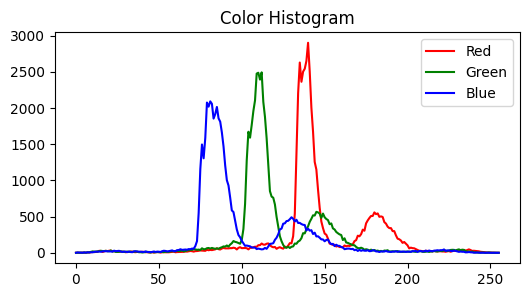

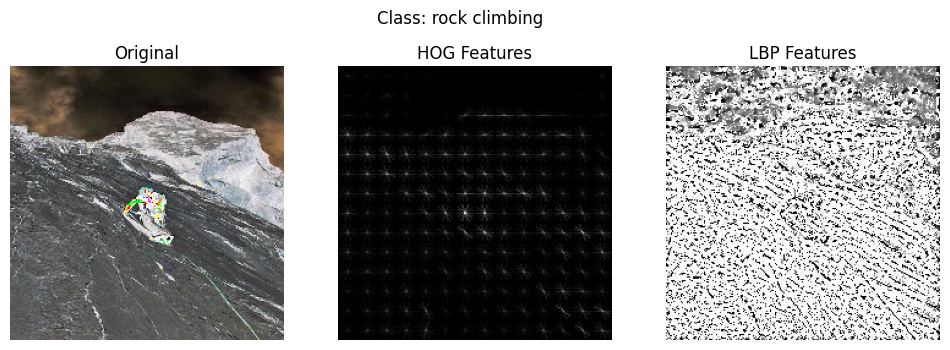

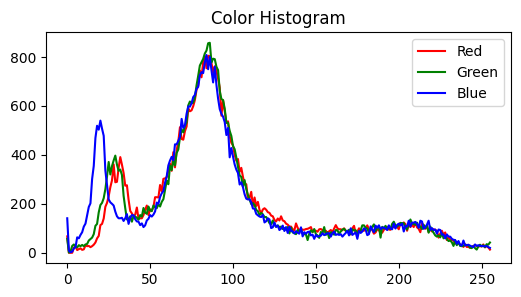

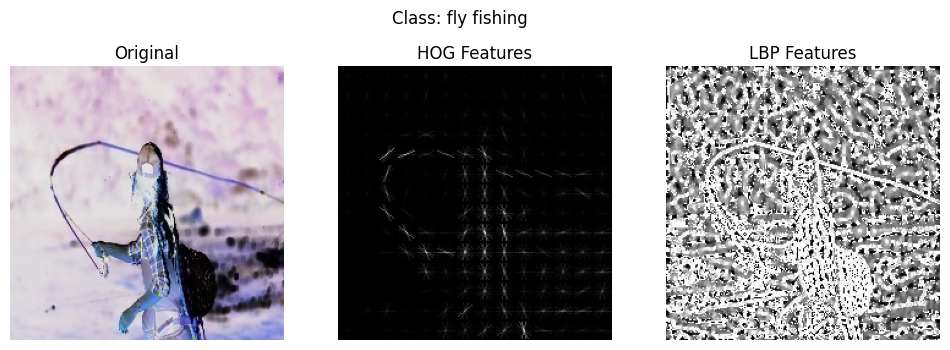

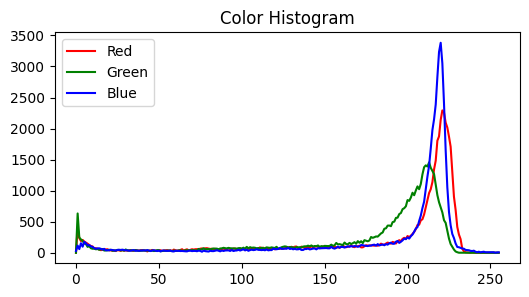

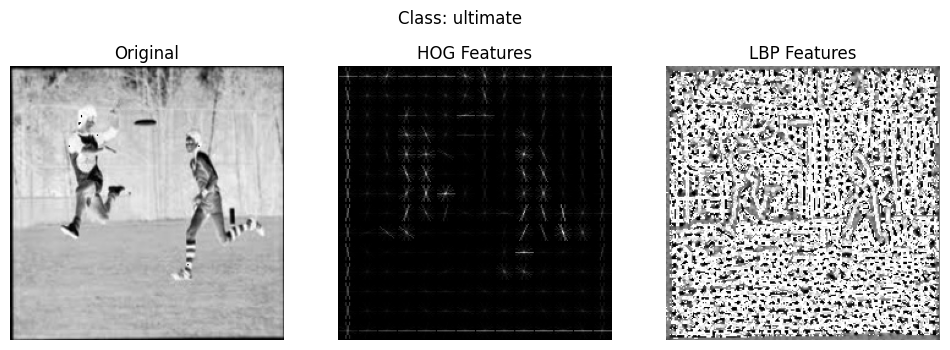

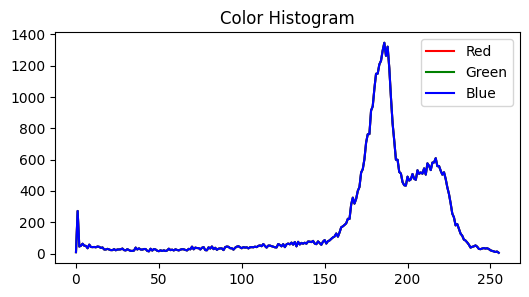

In [38]:
# Display first 5 images with feature extraction
for i in range(5):
    img = (sample_images[i] * 255).astype(np.uint8)  # Convert to 8-bit format
    hog_img, lbp_img, hist_r, hist_g, hist_b = extract_features(img)

    # Show original, HOG, and LBP images
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    
    axes[0].imshow(img.astype("uint8"))  # Original Image
    axes[0].set_title("Original")
    
    axes[1].imshow(hog_img, cmap="gray")  # HOG Image
    axes[1].set_title("HOG Features")
    
    axes[2].imshow(lbp_img, cmap="gray")  # LBP Image
    axes[2].set_title("LBP Features")

    for ax in axes:
        ax.axis("off")  # Hide axes
    
    plt.suptitle(f"Class: {class_names[sample_labels[i]]}")
    plt.show()

    # Plot color histograms
    plt.figure(figsize=(6, 3))
    plt.plot(hist_r, color='red', label='Red')
    plt.plot(hist_g, color='green', label='Green')
    plt.plot(hist_b, color='blue', label='Blue')
    plt.title("Color Histogram")
    plt.legend()
    plt.show()


Found 800 images belonging to 100 classes.
Found 200 images belonging to 100 classes.
Classes: ['air hockey', 'ampute football', 'archery', 'arm wrestling', 'axe throwing', 'balance beam', 'barell racing', 'baseball', 'basketball', 'baton twirling', 'bike polo', 'billiards', 'bmx', 'bobsled', 'bowling', 'boxing', 'bull riding', 'bungee jumping', 'canoe slamon', 'cheerleading', 'chuckwagon racing', 'cricket', 'croquet', 'curling', 'disc golf', 'fencing', 'field hockey', 'figure skating men', 'figure skating pairs', 'figure skating women', 'fly fishing', 'football', 'formula 1 racing', 'frisbee', 'gaga', 'giant slalom', 'golf', 'hammer throw', 'hang gliding', 'harness racing', 'high jump', 'hockey', 'horse jumping', 'horse racing', 'horseshoe pitching', 'hurdles', 'hydroplane racing', 'ice climbing', 'ice yachting', 'jai alai', 'javelin', 'jousting', 'judo', 'lacrosse', 'log rolling', 'luge', 'motorcycle racing', 'mushing', 'nascar racing', 'olympic wrestling', 'parallel bar', 'pole clim

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        51,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,967,204 (11.32 MB)

 Trainable params: 708,196 (2.70 MB)

 Non-trainable params: 2,259,008 (8.62 MB)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.0270 - loss: 5.4912 - val_accuracy: 0.0600 - val_loss: 4.4044 - learning_rate: 0.0010
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 784ms/step - accuracy: 0.2414 - loss: 3.3121 - val_accuracy: 0.2300 - val_loss: 3.3045 - learning_rate: 0.0010
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 642ms/step - accuracy: 0.4396 - loss: 2.3261 - val_accuracy: 0.3400 - val_loss: 2.7118 - learning_rate: 0.0010
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 776ms/step - accuracy: 0.5171 - loss: 1.8766 - val_accuracy: 0.4100 - val_loss: 2.3178 - learning_rate: 0.0010
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 739ms/step - accuracy: 0.6407 - loss: 1.4805 - val_accuracy: 0.4600 - val_loss: 2.1838 - learning_rate: 0.0010
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 684ms/step - accuracy: 0.6684 - loss: 1.2455 - val_accuracy: 0.4650 - val_loss: 2.0434 - learning_rate: 0.0010
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 720ms/step - accuracy: 0.7326 - loss: 1.085

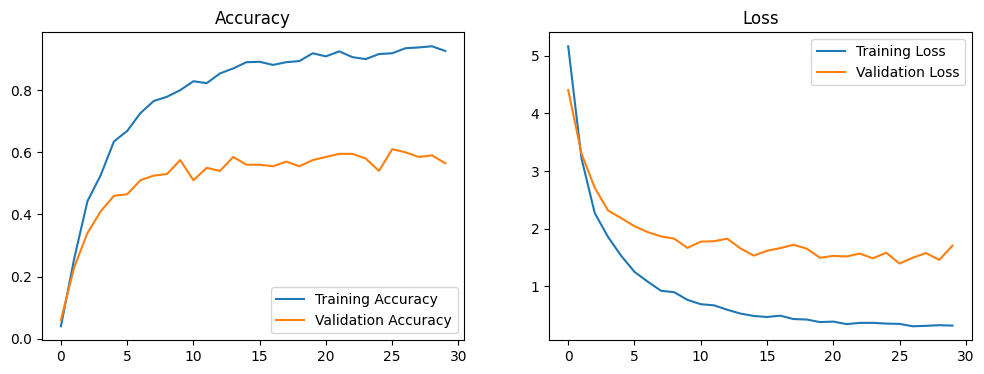

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os

# Define dataset paths
train_dir = r"E:\WINTER SEMESTER 24-45\DIGITAL IMAGE PROCESSING\archive\train_10"
test_dir = r"E:\WINTER SEMESTER 24-45\DIGITAL IMAGE PROCESSING\archive\test_1000_flat"

# Define image size and batch size
img_size = (224, 224)  # Increased size for better feature extraction
batch_size = 32

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],  # Adjust brightness
    validation_split=0.2  # Splitting dataset for validation
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Get class labels
class_names = list(train_generator.class_indices.keys())
print("Classes:", class_names)

# Load Pretrained MobileNetV2 Model (Transfer Learning)
base_model = keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze pretrained layers

# Build the Improved Model
model = keras.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),  # Helps prevent overfitting
    keras.layers.Dense(len(class_names), activation='softmax')
])

# Compile the Model with Learning Rate Scheduling
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model Summary
model.summary()

# Callbacks for Better Training
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Train the Model
epochs = 30  # Increased epochs for better learning
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    callbacks=[early_stopping, lr_scheduler]
)

# Plot Accuracy and Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

# Prediction Function
def predict_image(image_path):
    img = keras.preprocessing.image.load_img(image_path, target_size=img_size)
    img_array = keras.preprocessing.image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    return predicted_class

# Predicting on Test Images
def predict_test_images(test_dir):
    test_images = [os.path.join(test_dir, img) for img in os.listdir(test_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]
    for img_path in test_images:
        print(f"Image: {img_path} -> Predicted Sport: {predict_image(img_path)}")

# Example usage (Uncomment to test on images)



In [7]:
# Save the full model (architecture + weights + optimizer state)
model_save_path = r"E:\WINTER SEMESTER 24-45\DIGITAL IMAGE PROCESSING\archive\saved_models\sports_detection.h5"
model.save(model_save_path)
print(f"Model saved to {model_save_path}")


Model saved to E:\WINTER SEMESTER 24-45\DIGITAL IMAGE PROCESSING\archive\saved_models\sports_detection.h5
